In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
acc_res = pd.read_csv("acc_results.csv")

models = ['llama3.1-70b', 'llama3.1', 'llama3.2', 'mixtral', 'mistral', 'nemo', 'llava', 'idefics2']

style = {
            "edgecolor": "black",
            "linewidth": 0.5,
            }

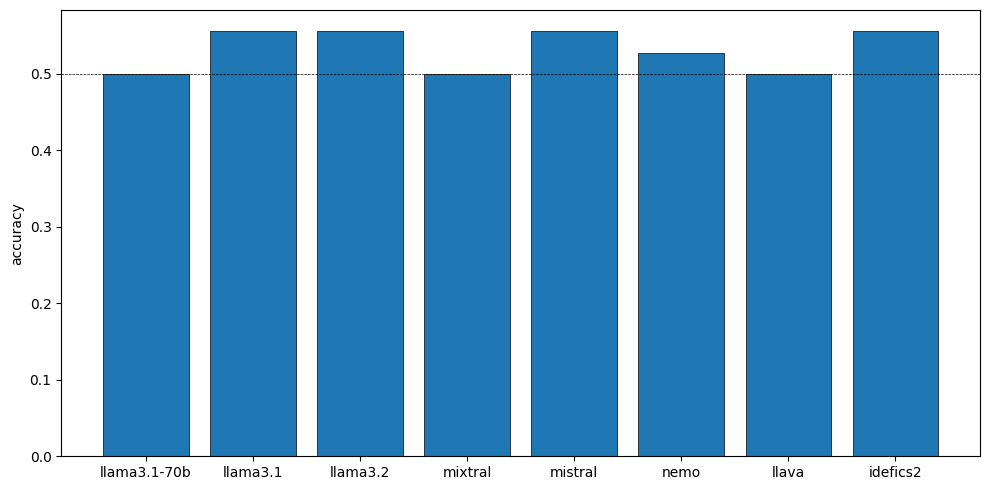

In [21]:
acc_models = acc_res[models].sum() / len(acc_res)

fig, ax = plt.subplots(1, 1, figsize=(10, 5), layout="tight")

ax.bar(x=acc_models.index, height=acc_models.values, **style)
ax.axhline(0.5, linestyle="--", linewidth=0.5, color="black")

ax.set_ylabel("accuracy")

fig.show()



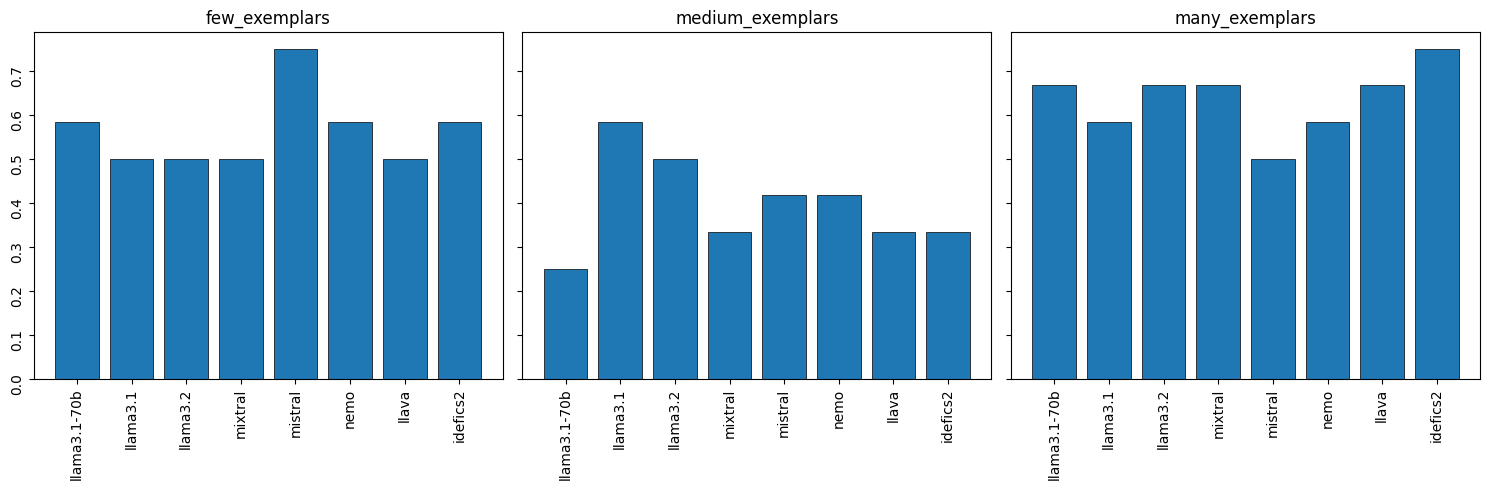

In [22]:
modes = ["few_exemplars", "medium_exemplars", "many_exemplars"]

fig, axs = plt.subplots(1, 3, figsize=(15, 5), layout="tight", sharey=True)
axs = axs.ravel()

for i, m in enumerate(modes):
    selected = acc_res[acc_res.classif == m]
    _accs = selected[models].sum() / len(selected)

    axs[i].bar(x=_accs.index, height=_accs.values, **style)
    axs[i].set_title(m)
    axs[i].tick_params(labelrotation=90)

plt.show()


In [24]:
import glob

In [40]:
concepts = glob.glob("concept_corr/*.csv")
concepts = [c.split("_")[-1].replace(".csv", "") for c in concepts]
print(f"{len(concepts)=}")

len(concepts)=36


In [51]:
clf2conc = {}
for k, v in acc_res.groupby("classif"):
    clf2conc[k] = v.concept.to_list()


In [54]:
[v for v in clf2conc.keys()]

['few_exemplars', 'many_exemplars', 'medium_exemplars']

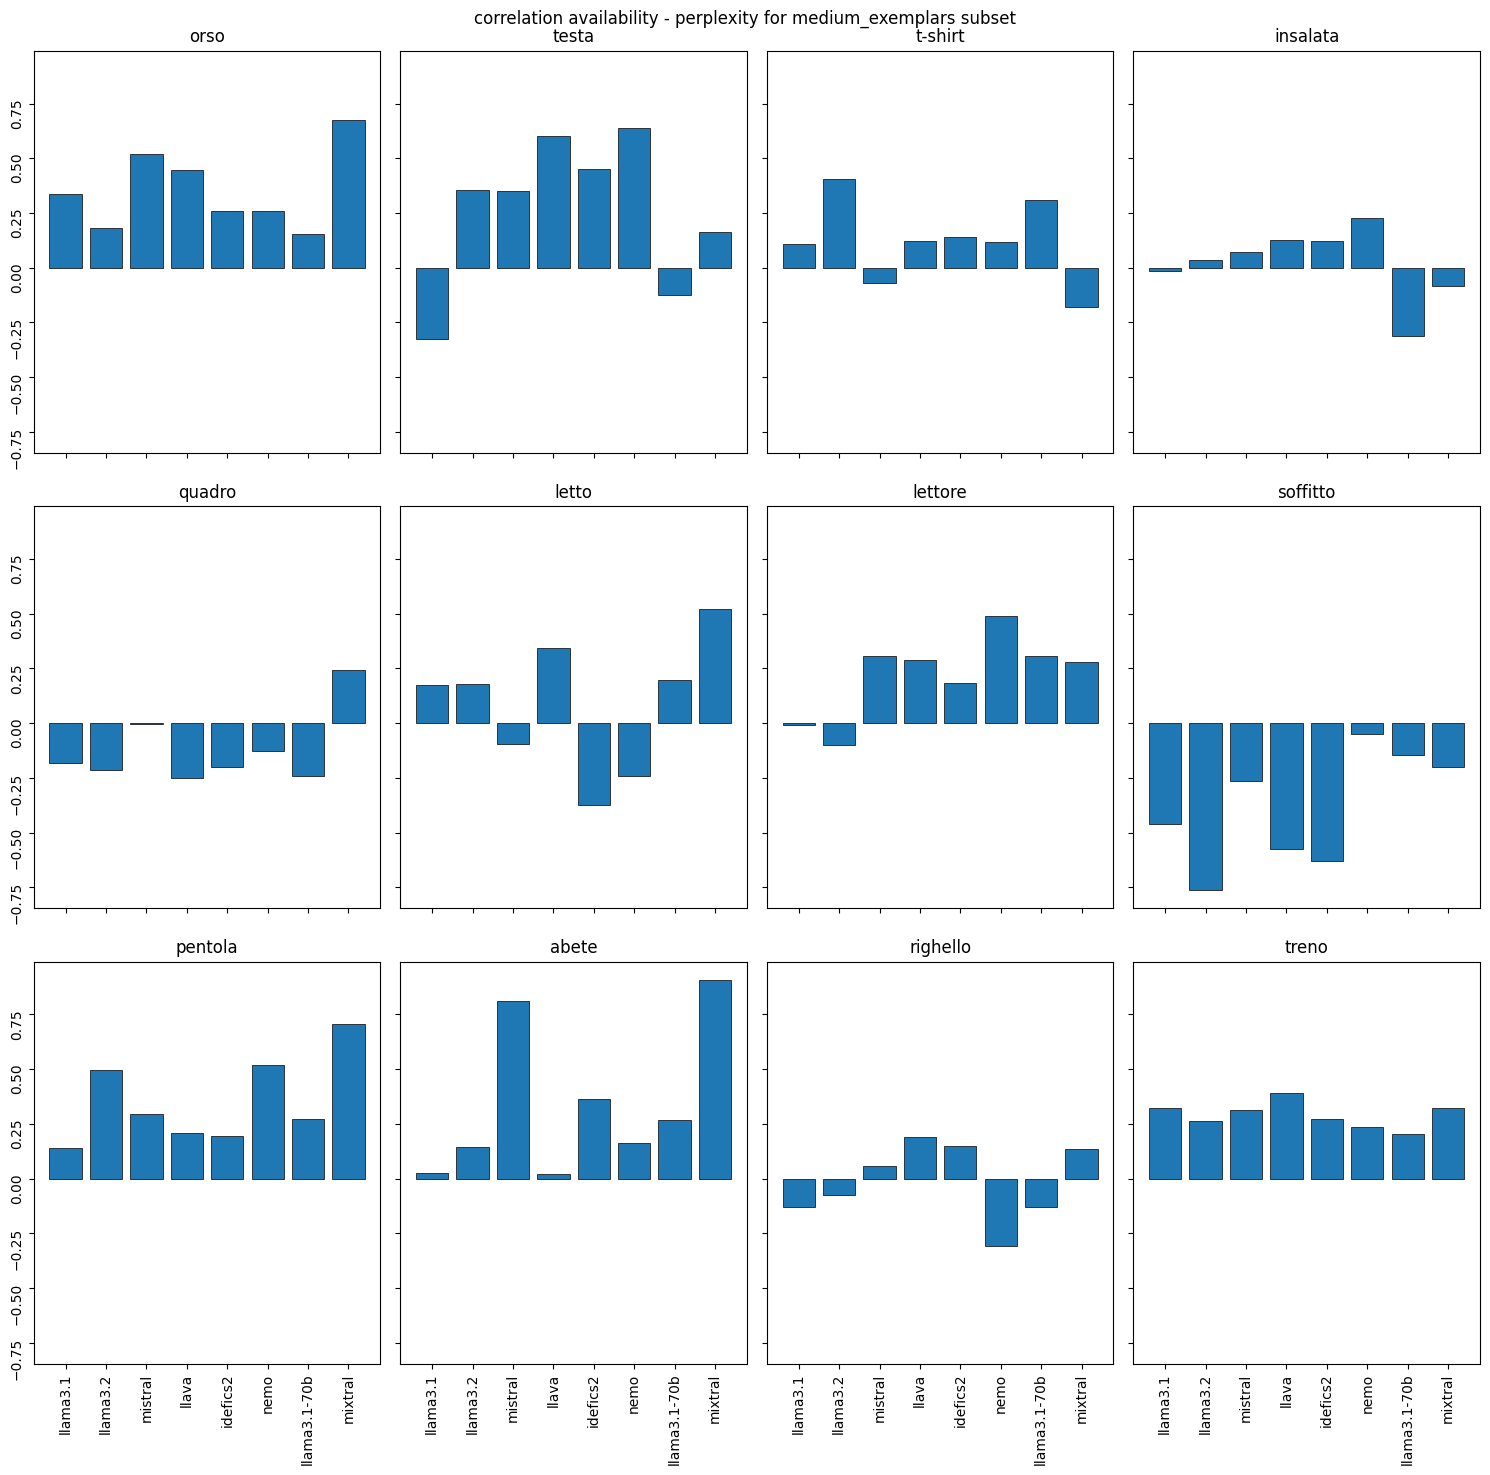

In [69]:
modes = ["few_exemplars", "medium_exemplars", "many_exemplars"]

fig, axs = plt.subplots(3, 4, figsize=(15, 15), layout="tight", sharey=True, sharex=True)
axs = axs.ravel()

mode = modes[1]
for i, concept in enumerate(clf2conc[mode]):
    corr_concept = pd.read_csv(f"concept_corr/corr_{concept}.csv").iloc[0][1:]
    axs[i].bar(x=corr_concept.index, height=corr_concept.values, **style)
    axs[i].set_title(concept)
    axs[i].tick_params(labelrotation=90)


fig.suptitle(f"correlation availability - perplexity for {mode} subset")

plt.savefig(f"corr.{mode}.png")

plt.show()

In [76]:
corr_few = pd.read_csv("corr_few_exemplars.csv").iloc[0][1:]
corr_medium = pd.read_csv("corr_medium_exemplars.csv").iloc[0][1:]
corr_many = pd.read_csv("corr_many_exemplars.csv").iloc[0][1:]

In [77]:
corr_few

llama3.1       -0.074499
llama3.2       -0.211886
mistral         0.023948
llava           0.021910
idefics2       -0.069449
nemo            0.022999
llama3.1-70b   -0.065007
mixtral         0.198899
Name: 0, dtype: float64

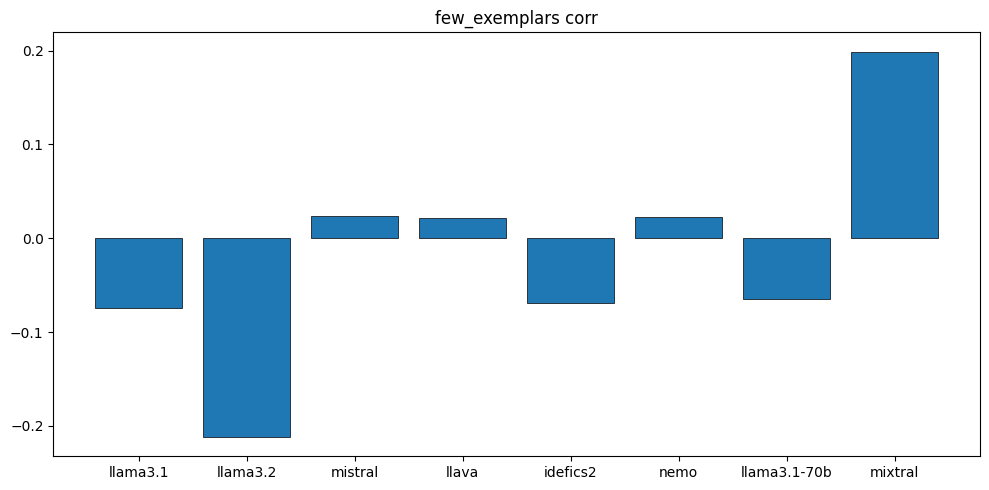

In [91]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5), layout="tight")

ax.bar(x=corr_few.index, height=corr_few.values, **style)
plt.title("few_exemplars corr")

# plt.show()
plt.savefig("corr_few_exemplars.avg.png")

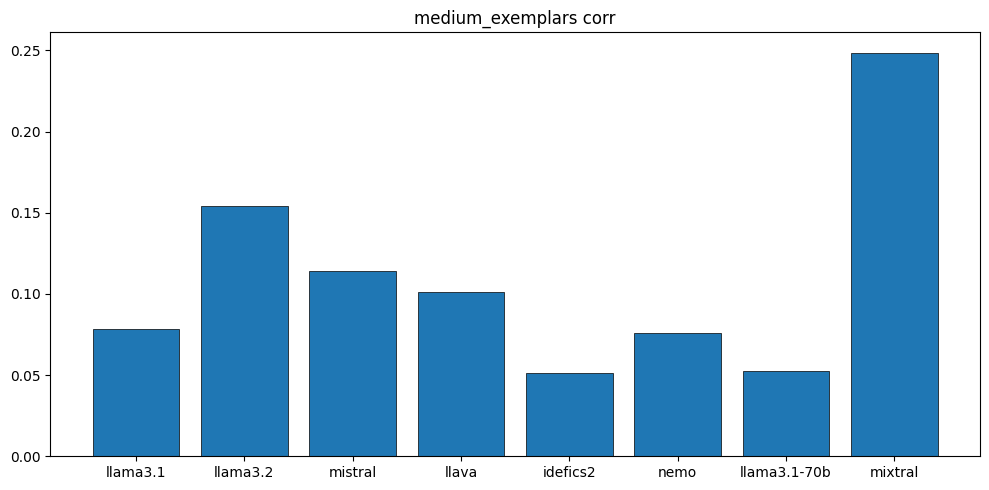

In [89]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5), layout="tight")

ax.bar(x=corr_medium.index, height=corr_medium.values, **style)
plt.title("medium_exemplars corr")


# plt.show()

plt.savefig("corr_medium_exemplars.avg.png")

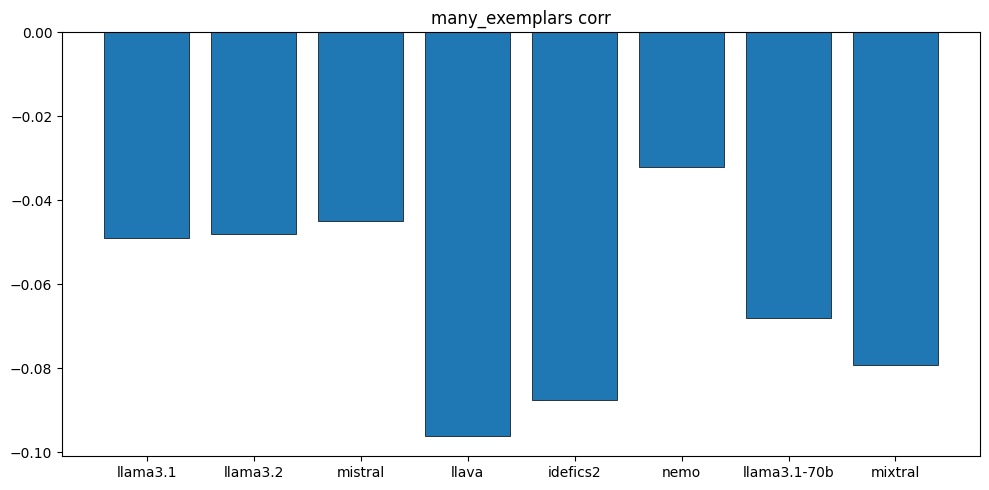

In [92]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5), layout="tight")

ax.bar(x=corr_many.index, height=corr_many.values, **style)
plt.title("many_exemplars corr")

# plt.show()

plt.savefig("corr_many_exemplars.avg.png")